In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
#import seaborn as sns

In [2]:
batch_size = 100
img_h = 250
img_w = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\Aryan raj\Accn_detection_model\data\train",
    seed=42,
    image_size= (img_h, img_w),
    batch_size=batch_size

)

Found 791 files belonging to 2 classes.


In [4]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\Aryan raj\Accn_detection_model\data\val",
    seed=42,
    image_size= (img_h, img_w),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [5]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\Aryan raj\Accn_detection_model\data\test",
    seed=42,
    image_size= (img_h, img_w),
    batch_size=batch_size)

Found 100 files belonging to 2 classes.


In [6]:
#Autotuning data for performance
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
model_cnn =tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model_cnn.fit(training_ds, validation_data= validation_ds , epochs = 20)

Epoch 1/20
8/8 [==============================] - 5s 325ms/step - loss: 5.3095 - accuracy: 0.5601 - val_loss: 1.3035 - val_accuracy: 0.4694
Epoch 2/20
8/8 [==============================] - 1s 174ms/step - loss: 0.6517 - accuracy: 0.6131 - val_loss: 0.5586 - val_accuracy: 0.6939
Epoch 3/20
8/8 [==============================] - 1s 174ms/step - loss: 0.5888 - accuracy: 0.6991 - val_loss: 0.5762 - val_accuracy: 0.7245
Epoch 4/20
8/8 [==============================] - 1s 174ms/step - loss: 0.5470 - accuracy: 0.7244 - val_loss: 0.9176 - val_accuracy: 0.5510
Epoch 5/20
8/8 [==============================] - 1s 174ms/step - loss: 0.4809 - accuracy: 0.7699 - val_loss: 1.1275 - val_accuracy: 0.5306
Epoch 6/20
8/8 [==============================] - 1s 172ms/step - loss: 0.3925 - accuracy: 0.8230 - val_loss: 1.1588 - val_accuracy: 0.5918
Epoch 7/20
8/8 [==============================] - 1s 174ms/step - loss: 0.3164 - accuracy: 0.8837 - val_loss: 0.6025 - val_accuracy: 0.7653
Epoch 8/20
8/8 [====

In [11]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 250, 250, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                        

4/4 [==============================] - 0s 89ms/step


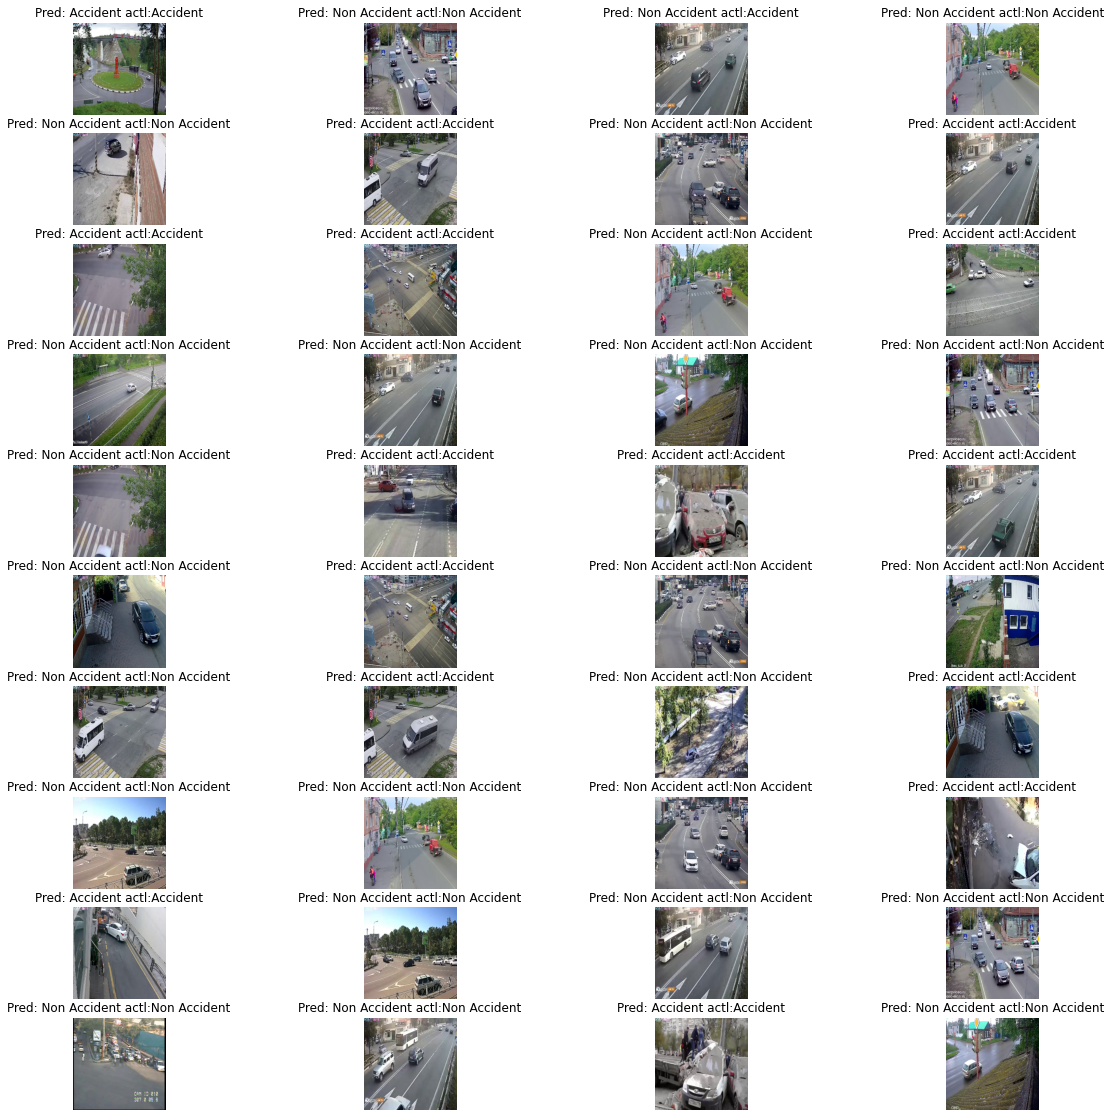

In [16]:
AccuracyVector = []
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = model_cnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [18]:
model_cnn.save('Accident_pred.h5')

